In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [ ]:
x123 = np.loadtxt("/Users/awuzaso/Documents/codingProjects/Tutorial1/123.txt")
x123=x123[:,2]
x208 = np.loadtxt("./208.txt")
x208=x208[:,2]

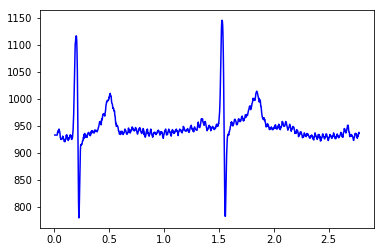

In [4]:
# a) Visualization of normal ECG signal:
L=1000
Fs=360
plt.figure(1)
t=np.linspace(1,L,L)/Fs
plt.plot(t,x123[0:L],'b-')
#mpld3.display(fig)


In [5]:
x123_P=x123[437:521];
x123_QRS=x123[522:584];
x123_T=x123[609:710];



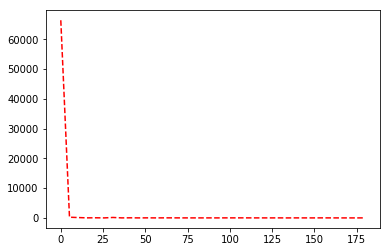

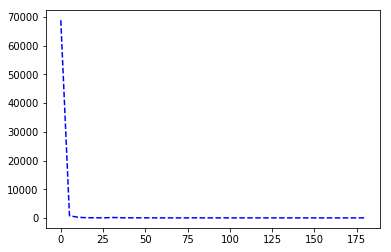

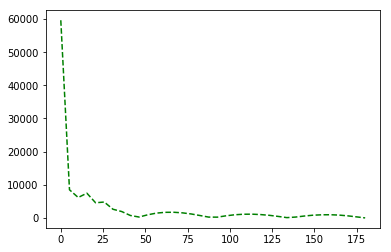

In [55]:
# b) Fourier computation of ECG components:
N=70 # FFT length

fft_x123_P=np.fft.rfft(x123_P,N)
fft_x123_T=np.fft.rfft(x123_T,N)
fft_x123_QRS=np.fft.rfft(x123_QRS,N)

f = np.linspace(0,(Fs/2),N/2+1)

plt.figure(4);plt.plot(f,np.abs(fft_x123_P),'r--')
plt.figure(5);plt.plot(f,np.abs(fft_x123_T),'b--')
plt.figure(6);plt.plot(f,np.abs(fft_x123_QRS),'g--')

(3000, 3000, 3000)
(3013, 50)
[0 0 0 1 1 1 2 2 2 3 3 4 4 4 5 5 5 6 6 7 7 8]


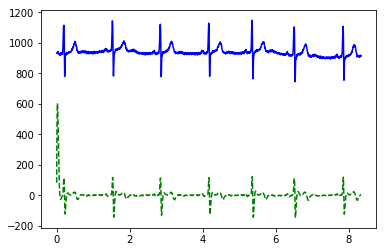

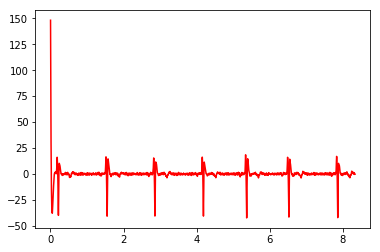

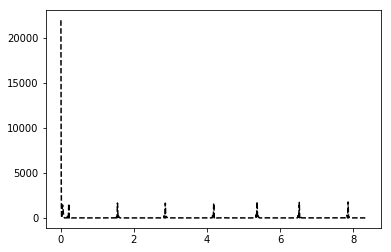

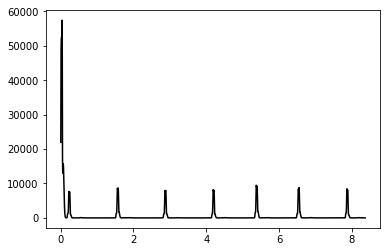

<Figure size 432x288 with 0 Axes>

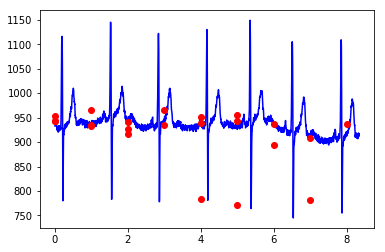

In [6]:
# c) QRS detection:

def bandpass_filter(x, lowcut, highcut, Fs, filter_order):
    nyquist_freq = 0.5 * Fs
    low = lowcut / nyquist_freq
    high = highcut / nyquist_freq
    b, a = signal.butter(filter_order, [low, high], btype="band")
    y = signal.lfilter(b, a, x)
    return (y,b,a)

def findpeaks(data, spacing, limit):
        print(len(data),spacing)
        x = np.zeros(len(data) + 2 * spacing)
        x[:spacing] = data[0] - 1.e-6
        x[-spacing:] = data[-1] - 1.e-6
        x[spacing:spacing + len(data)] = data
        peak_candidate = np.zeros(len(data))
        peak_candidate[:] = True
        for s in range(spacing):
            start = spacing - s - 1
            h_b = x[start: start + len(data)]  # before
            start = spacing
            h_c = x[start: start + len(data)]  # central
            start = spacing + s + 1
            h_a = x[start: start + len(data)]  # after
            peak_candidate = np.logical_and(peak_candidate, np.logical_and(h_c > h_b, h_c > h_a))
        ind = np.argwhere(peak_candidate)
        ind = ind.reshape(ind.size)
        if limit is not None:
            ind = ind[data[ind] > limit]
        return ind

# segment original signal
L=3000
x=x123[0:L]
t=np.linspace(1,L,L)/Fs

# band-pass filter
(lowcut,highcut,filter_order)=(4,15,1)
(x_bfilt,b,a)=bandpass_filter(x, lowcut, highcut, Fs, filter_order)
print(L,len(t),len(x))
plt.figure(7);plt.plot(np.linspace(1,len(x_bfilt),len(x_bfilt))/Fs,x,'b-',t,x_bfilt,'g--')

# differentiate
x_bfilt_diff=np.ediff1d(x_bfilt)
plt.figure(9);plt.plot(np.linspace(1,len(x_bfilt_diff),len(x_bfilt_diff))/Fs,x_bfilt_diff,'r-')

# square
x_bfilt_diff_sq=x_bfilt_diff**2
plt.figure(10);plt.plot(np.linspace(1,len(x_bfilt_diff_sq),len(x_bfilt_diff_sq))/Fs,x_bfilt_diff_sq,'k--')

# moving average filter
MAfilter_len=15
x_bfilt_diff_sq_smooth = np.convolve(x_bfilt_diff_sq, np.ones(MAfilter_len))
plt.figure(12);plt.figure(11);plt.plot(np.linspace(1,len(x_bfilt_diff_sq_smooth),len(x_bfilt_diff_sq_smooth))/Fs,x_bfilt_diff_sq_smooth,'k-')

# find peaks
(findpeaks_limit,findpeaks_spacing)=(0.35,50)
peaks_indices = findpeaks(x_bfilt_diff_sq_smooth,findpeaks_spacing,findpeaks_limit)
print(peaks_indices/Fs)

plt.figure(13);
plt.plot(np.linspace(1,len(x),len(x))/Fs,x,'b-',peaks_indices/Fs,x[peaks_indices], 'ro')

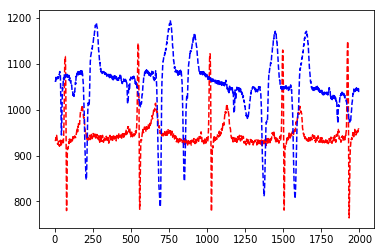

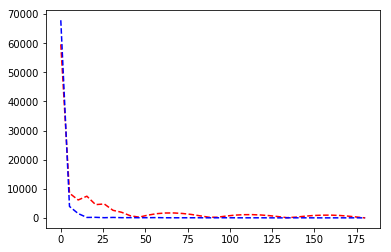

In [49]:
# d) Visualization and Fourier computation of PVC beats:

N=70;

x_normal=x123[522:584]

x_PVC=x208[1321:1491] #Isolated premature ventricular beat

fft_x_normal=np.fft.rfft(x_normal,N)

fft_x_PVC=np.fft.rfft(x_PVC,N)

f = np.linspace(0,(Fs/2),N/2+1)

plt.figure(10); 
plt.plot(x123[1:2000],'r--',x208[1:2000],'b--') # Comparison over 2000 time samples

# d) Comparison of the frequency spectrum between a normal and a PVC beat.
plt.figure(11);
plt.plot(f,np.abs(fft_x_normal),'r--',f,np.abs(fft_x_PVC),'b--')